In [1]:
from definir_coupe import *
%matplotlib widget 
import matplotlib
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/MIP_constraints/Python/")
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem")
from _3DLoops._3dpu_using_dfs import *
import nibabel as nb
ROOT = "../"
from CreatingCycles import *

In [2]:
G = simple_3D_Graph(0,50,0,50,0,6)
G.create_graph()
L = nx.cycle_basis(G.graph)
lengths = [len(l) for l in L]
max_ind = lengths.index(50)
max_cycle = L[max_ind] + [L[max_ind][0]]
cycle = [G.mapping[i] for i in max_cycle]
G = 0

  0%|          | 0/18207 [00:00<?, ?it/s]

100%|██████████| 18207/18207 [00:00<00:00, 144015.56it/s]


In [3]:
ROOT = '..'
file_path = '/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/Results/ph_loops.pkl'

# Read the pickle file
with open(file_path, "rb") as file:
    data = pickle.load(file)


In [25]:
cycle1 = data.cycles[0]
cycle1 = [data.mapping[i] for i in cycle1]
cycle1

[(1, 0, 25, 0, -1),
 (0, 0, 26, 2, 1),
 (1, 0, 26, 0, 1),
 (1, 0, 27, 2, 1),
 (1, 0, 27, 0, -1),
 (0, 1, 27, 1, 1),
 (1, 1, 27, 0, 1),
 (2, 1, 27, 0, 1),
 (3, 1, 27, 0, 1),
 (3, 1, 27, 1, -1),
 (3, 0, 27, 2, -1),
 (3, 1, 26, 1, 1),
 (3, 2, 26, 1, 1),
 (4, 2, 26, 0, 1),
 (4, 3, 26, 1, 1),
 (4, 3, 26, 0, -1),
 (3, 3, 26, 0, -1),
 (2, 3, 26, 2, -1),
 (2, 3, 25, 0, -1),
 (1, 3, 25, 2, -1),
 (1, 3, 24, 1, -1),
 (1, 2, 24, 0, -1),
 (0, 3, 24, 1, 1),
 (0, 3, 25, 2, 1),
 (0, 4, 25, 1, 1),
 (0, 4, 26, 2, 1),
 (0, 4, 26, 1, -1),
 (0, 3, 26, 1, -1),
 (0, 2, 26, 2, -1),
 (0, 2, 25, 1, -1),
 (0, 1, 25, 2, -1),
 (1, 1, 24, 0, 1),
 (2, 1, 24, 0, 1),
 (2, 1, 24, 1, -1),
 (2, 0, 25, 2, 1),
 (2, 0, 25, 0, -1),
 (1, 0, 25, 0, -1)]

In [4]:
convex_hull = Convex_hull(cycle)
G_full_convex_hull_graph = convex_hull.convex_hull_3D_full()


100%|██████████| 540/540 [00:00<00:00, 157548.98it/s]


50


100%|██████████| 50/50 [00:00<00:00, 500.75it/s]


next_f done
128


100%|██████████| 128/128 [00:00<00:00, 210.25it/s]


next_f done
129


100%|██████████| 129/129 [00:00<00:00, 208.28it/s]


next_f done


100%|██████████| 14/14 [00:00<00:00, 501882.53it/s]


Convex hull is empty


100%|██████████| 8/8 [00:00<00:00, 307838.83it/s]


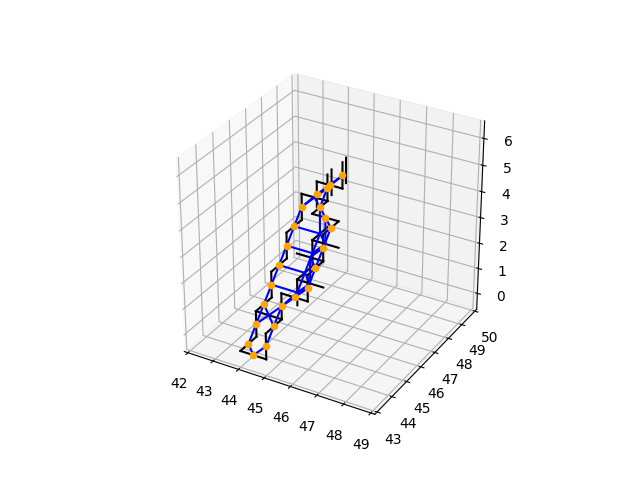

In [13]:
color1,color2 = color(G_full_convex_hull_graph)
cap = 100
dense_edges = convex_hull.graph_dense.edges()
G_flot = nx.Graph()
s = -1
t = -2

for p in color1:
    G_flot.add_edge(s,p,capacity=cap)
    
for p in color2:    
    G_flot.add_edge(p,t,capacity = cap)

for e in dense_edges:
    u,v = e
    G_flot.add_edge(u,v,capacity=1)



cut_value, (set_S, set_T) = nx.minimum_cut(G_flot, s, t)

# Find the edges in the minimum cut
new_cut = [(u, v) for u, v in G_flot.edges() if (u in set_S and v in set_T) or (v in set_S and u in set_T)]




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

X = []
Y = []
Z = []
for point in cycle:
    x,y,z = point
    X.append(x)
    Y.append(y)
    Z.append(z)
# ax.plot(X,Y,Z, c='pink')

# Nodes = set()
# for edge in new_cut:
#     u,v = edge
#     Nodes.add(u)
#     Nodes.add(v)
# graph_edges = convex_hull.graph_dense.subgraph(Nodes)
# for edge in graph_edges.edges():
#     u,v = edge
#     x1,y1,z1 = convex_hull.Graph.mapping[u]
#     x2,y2,z2 = convex_hull.Graph.mapping[v]
#     ax.plot([x1,x2],[y1,y2],[z1,z2], c='black')

for edge in new_cut:
    u,v = edge
    x1,y1,z1 = convex_hull.Graph.mapping[u]
    x2,y2,z2 = convex_hull.Graph.mapping[v]
    ax.plot([x1,x2],[y1,y2],[z1,z2], c='black')

#     if u in set_S:
#         ax.scatter(x1,y1,z1,c='red')
#     if v in set_S:
#         ax.scatter(x2,y2,z2,c='red')
#     if u in set_T:
#         ax.scatter(x1,y1,z1,c='green')
#     if v in set_T:
#         ax.scatter(x2,y2,z2,c='green')

# edges_graph_all = new_graph(convex_hull, convex_hull.graph_dense.edges())
# edges_graph = new_graph(convex_hull, new_cut)
# print(nx.is_planar(edges_graph))

edges_graph = new_graph(convex_hull, new_cut)
tails = convex_hull.detect_tail(edges_graph)

# for edge in edges_graph_all.edges():
#     u,v= edge
#     x1,y1,z1 = u
#     x2,y2,z2 = v
#     if x1 in [44,45] or x2 in [44,45]:
#         ax.plot([x1,x2],[y1,y2],[z1,z2], c='pink')


for edge in edges_graph.edges():
    u,v = edge
    x1,y1,z1 = u
    x2,y2,z2 = v
    ax.plot([x1,x2],[y1,y2],[z1,z2], c='blue')


bord = bordure(edges_graph)
bord_edges = []
for i in range(len(bord)-1):
    bord_edges.append((bord[i],bord[i+1]))

for node in bord:
    x,y,z = node
    ax.scatter(x,y,z, c='orange')


# for node in deg_2_nodes:
#     x,y,z = node
#     ax.scatter(x,y,z, c='red')
#     for n in edges_graph.neighbors(node):
#         x1,y1,z1 = n
#         ax.scatter(x1,y1,z1, c='red')
#         ax.plot([x,x1],[y,y1],[z,z1], c='red')



    

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()

In [8]:

def detect_faces(edges_graph):
    faces = []
    dict_cycles = {}
    cycles = list(nx.simple_cycles(edges_graph))
    sorted_cycles = sorted(cycles, key=lambda cycle: len(cycle))
    Forbidden_nodes = []
    
    for node in edges_graph.nodes():
        dict_cycles[node] = []
    
    for cycle in cycles:
        for node in cycle:
            dict_cycles[node].append(cycle)
    
    cpt = 0
    cap  = len(nx.cycle_basis(edges_graph))
    while cpt < len(sorted_cycles) and len(faces) < cap:
        Verify = True
        cycle = sorted_cycles[cpt]
        for node_family in Forbidden_nodes:
            Verify = Verify and not set(node_family).issubset(set(cycle))
        if Verify:
            faces.append(cycle)
            Forbidden_nodes.append(set(cycle))
        cpt += 1
    
    return faces
                

def bordure(edges_graph):
    faces = detect_faces(edges_graph)
    dict_nodes = dict()
    for node in edges_graph.nodes():
        dict_nodes[node] = []
    
    for face in faces:
        for node in face:
            dict_nodes[node].append(face)
    
    node_border = [node for node in edges_graph.nodes() if len(dict_nodes[node]) <edges_graph.degree(node)]
    return node_border





In [15]:
faces = detect_faces(edges_graph)
len(faces)


19

In [6]:
def in_same_square(self,e1,e2):
    u1,v1 = e1
    u2,v2 = e2
    squre_graph = self.graph_dense.subgraph([u1,v1,u2,v2])
    cycles = nx.cycle_basis(squre_graph)
    if len(cycles) == 1:
        return True
    elif len(set([u1,v1,u2,v2])) == 3:
        set_x = set()
        set_y = set()
        set_z = set()
        for point in [u1,v1,u2,v2]:
            x,y,z = self.Graph.mapping[point]
            set_x.add(x)
            set_y.add(y)
            set_z.add(z)
        if len(set_x) == 1 and len(set_y) == 1:
            return False
        if len(set_x) == 1 and len(set_z) == 1:
            return False
        if len(set_y) == 1 and len(set_z) == 1:
            return False
        return True
    return False



def new_graph(self,new_cut):
    Couple_edges = []
    for e1 in new_cut:
        for e2 in new_cut:
            if e1 != e2:
                if in_same_square(self,e1,e2):
                    Couple_edges.append((e1,e2))

    graph_edges = nx.Graph()

    for e1,e2 in Couple_edges:
        n1 = (np.array(self.Graph.mapping[e1[0]]) + np.array(self.Graph.mapping[e1[1]]))/2
        n2 = (np.array(self.Graph.mapping[e2[0]]) + np.array(self.Graph.mapping[e2[1]]))/2
        graph_edges.add_edge(tuple(n1),tuple(n2))
    return graph_edges

def get_node_edges(self,new_cut):
    Nodes = []
    for edge in new_cut:
        u,v = edge
        n = (np.array(self.Graph.mapping[u]) + np.array(self.Graph.mapping[v]))/2
        Nodes.append(tuple(n))
    return Nodes

In [259]:
Mapping = list(edges_graph.nodes())
Simple_easy_graph = nx.Graph()
for edge in edges_graph.edges():
    u,v = edge
    Simple_easy_graph.add_edge(Mapping.index(u),Mapping.index(v))


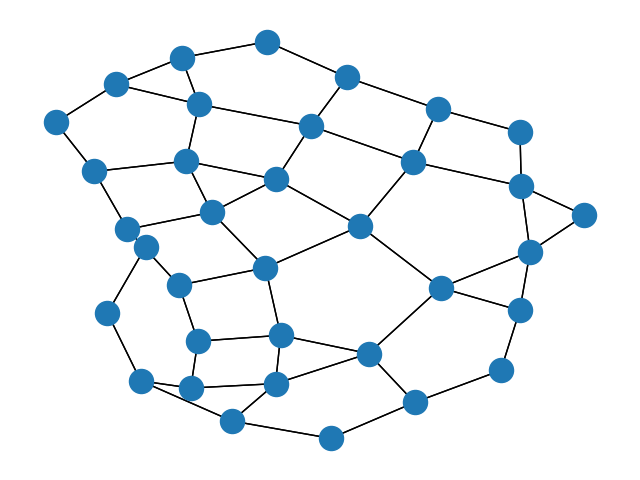

In [282]:
axe = plt.figure()
is_planar,embedding = nx.check_planarity(Simple_easy_graph)
nx.draw(embedding)
plt.draw()

In [198]:
def detect_face(graph_edges,e1,e2,node):
    assert node in e1 and node in e2 , "The common node is not in the two edges"
    v1 = [n for n in e1 if n != node][0]
    v2 = [n for n in e2 if n != node][0]
    S1 = set([v1])
    S2 = set([v2])
    visisted = set([v1,v2,node])
    while S1.intersection(S2) == set():
        for s in S1:
            new_set = set([n for n in graph_edges.neighbors(s) if n not in visisted])
            S1 = S1.union(new_set)
        for s in S2:
            new_set = set([n for n in graph_edges.neighbors(s) if n not in visisted])
            S2 = S2.union(new_set)
    return S1.intersection(S2)
    
n = (46.0, 46.5, 4.0) 
n1,n2 = [(46.0, 47.0, 3.5), (45.0, 46.5, 4.0)]
e1 = (n,n1)
e2 = (n,n2)        
detect_face(edges_graph,e1,e2,n)


    

{(45.0, 47.0, 3.5)}

In [40]:
cycles = nx.cycle_basis(subgraph_min_cut)
b_1 = []
b_2 = []
for cyc in cycles:
    cpt = 0
    edges = set()
    for i in range(len(cyc)):
        u = cycle[i]
        v = cycle[(i+1)%len(cyc)]
        edges.add((u,v))
        if (u,v) in min_cut_edges or (v,u) in min_cut_edges:
            cpt += 1
    if cpt % 2 == 1:
        b_1.append((cyc,cpt,edges))
    else:
        b_2.append((cyc,cpt,edges))
        
def linked(e1,e2):
    return False 


In [41]:
Graph_edges = nx.Graph()
for edge1 in subgraph_min_cut.edges():
    for edge2 in subgraph_min_cut.edges():
        if linked(edge1,edge2):
            Graph_edges.add_edge(edge1,edge2)
    

## Graph of edges idea

In [207]:
Graph_init = simple_3D_Graph(0,50,0,50,0,6)
Graph_init.create_graph()
len(Graph_init.graph.edges)
def in_same_face(e1,e2):
    a1,b1 = e1	
    a2,b2 = e2
    S = set([a1,b1,a2,b2])
    if len(S) != 4:
        return True
    elif:
        



    


100%|██████████| 18207/18207 [00:00<00:00, 144974.11it/s]


51306

## Old idea

In [16]:
def retricir_2():
    cycle_index = [convex_hull.Graph.index_mapping[i] for i in cycle]
    deg_2 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 2 and node not in cycle_index]
    while len(deg_2) > 0:
        print("one delete")
        convex_hull.graph_convex_hull.remove_nodes_from(deg_2)
        deg_2 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 2 and node not in cycle_index]

def bad_degree_3(node):
    "Gives a reduction of the meshing of the convex hull for elements of degree 3"
    neighbours = list(convex_hull.graph_convex_hull.neighbors(node))
    n1,n2,n3 = neighbours
    neighbours1 = set(convex_hull.graph_convex_hull.neighbors(n1))
    neighbours2 = set(convex_hull.graph_convex_hull.neighbors(n2))
    neighbours3 = set(convex_hull.graph_convex_hull.neighbors(n3))
    common12 = neighbours1.intersection(neighbours2)
    common13 = neighbours1.intersection(neighbours3)
    common23 = neighbours2.intersection(neighbours3)
    last_set_of_neighbours = common23.union(common12,common13)
    last_set_of_neighbours.remove(node)
    S = set()
    if len(last_set_of_neighbours) == 3:
        n12,n13,n23 = last_set_of_neighbours
        S.add((n1,n12))
        S.add((n1,n13))
        S.add((n2,n12))
        S.add((n2,n23))
        S.add((n3,n13))
        S.add((n3,n23))
    return S

def retricir_3():
    cycle_index = [convex_hull.Graph.index_mapping[i] for i in cycle]
    deg_3 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 3 and node not in cycle_index and bad_degree_3(node)]
    while len(deg_3) > 0:
        print("one delete")
        convex_hull.graph_convex_hull.remove_nodes_from(deg_3)
        deg_3 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 3 and node not in cycle_index and bad_degree_3(node)]

In [32]:
# retricir_2()
# retricir_3()
cycle_index = [convex_hull.Graph.index_mapping[i] for i in cycle]
convex_hull_edges = convex_hull.graph_convex_hull.edges()
convex_hull_nodes = convex_hull.graph_convex_hull.nodes()

deg_2 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 2]
deg_3 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 3]
deg_4 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 4]
deg_5 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 5]
deg_6 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 6]

bad_deg_3 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 3 and bad_degree_3(node) and node not in cycle_index]

In [80]:
#Purify the 2nd degree nodes
convex_hull = Convex_hull(cycle)
cycle_index = [convex_hull.Graph.index_mapping[i] for i in cycle]
deg_2 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 2 and node not in cycle_index]
while len(deg_2) > 0:
    print(deg_2)
    convex_hull.graph_dense.remove_nodes_from(deg_2)
    convex_hull.graph_convex_hull = nx.Graph()
    convex_hull.create_initial_convex_hull()
    deg_2 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 2 and node  not in cycle_index]

100%|██████████| 540/540 [00:00<00:00, 145785.54it/s]


50


100%|██████████| 50/50 [00:00<00:00, 513.07it/s]


next_f done
128


100%|██████████| 128/128 [00:00<00:00, 198.87it/s]


next_f done
129


100%|██████████| 129/129 [00:00<00:00, 212.16it/s]


next_f done
[106]
[115]
[124]
[133]
[142]


In [81]:
# Purify the 3rd degree nodes
deg_3 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 3 and node  not in cycle_index]
while len(deg_3) > 0:
    print(deg_3)
    convex_hull.graph_dense.remove_nodes_from(deg_3)
    convex_hull.graph_convex_hull = nx.Graph()
    convex_hull.create_initial_convex_hull()
    deg_3 = [node for node in convex_hull.graph_convex_hull.nodes() if convex_hull.graph_convex_hull.degree(node) == 3 and node  not in cycle_index]
    

[100, 190, 289, 293, 388, 105]
[397, 298, 199, 101, 191, 290, 292, 114, 109]
[307, 123, 208, 118, 192, 102, 200, 110]
[119, 111, 132, 127, 217, 103, 193]
[120, 128, 209, 112, 136, 141, 201]
[129, 226, 121, 210, 145]
[154, 130]
[155]
[156]
[157]
[158]
[159]


In [78]:

cycle_index = [convex_hull.Graph.index_mapping[i] for i in cycle]
convex_hull_edges = convex_hull.graph_convex_hull.edges()
convex_hull_nodes = convex_hull.graph_convex_hull.nodes()

## New idea

In [198]:
def derniere_couche_xy(cycle):
    z_min = min([point[2] for point in cycle])
    z_max = max([point[2] for point in cycle])
    blocked_axis = set()
    z_init = z_min
    S = set()
    while z_init <= z_max :
        point_z = [point for point in cycle if point[2] == z_init]
        for point in point_z:
            if (point[0],point[1]) not in blocked_axis:
                S.add(point)
                blocked_axis.add((point[0],point[1]))
        
        z_init += 1
    return S
                


def premiere_couche_xy(cycle):
    z_min = min([point[2] for point in cycle])
    z_max = max([point[2] for point in cycle])
    blocked_axis = set()
    z_init = z_max
    S = set()
    while z_init >= z_min :
        point_z = [point for point in cycle if point[2] == z_init]
        for point in point_z:
            if (point[0],point[1]) not in blocked_axis:
                S.add(point)
                blocked_axis.add((point[0],point[1]))
            
        z_init -= 1
    return S

In [199]:
last_layer_xy = derniere_couche_xy(cycle)

first_layer_xy = premiere_couche_xy(cycle)

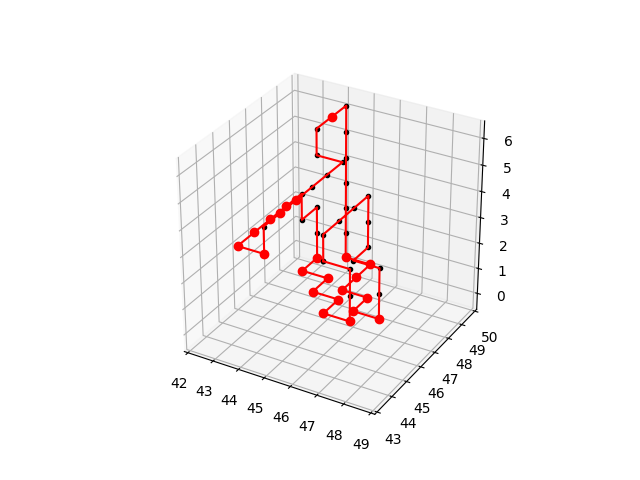

In [203]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


# for e in edges:
#     p1,p2 = e
#     x1,y1,z1 = G.mapping[p1]
#     x2,y2,z2 = G.mapping[p2]
#     ax.plot([x1,x2],[y1,y2],[z1,z2], c='b')


# for point in convex_hull.graph_dense.nodes():
#     x,y,z = convex_hull.Graph.mapping[point]
#     ax.plot([x],[y],[z], c='black', marker='.')

# for edge in convex_hull.graph_dense.edges():
#     p1,p2 = edge
#     x1,y1,z1 = convex_hull.Graph.mapping[p1]
#     x2,y2,z2 = convex_hull.Graph.mapping[p2]
#     ax.plot([x1,x2],[y1,y2],[z1,z2], c='black')

# for point in convex_hull_nodes:
#     x,y,z = convex_hull.Graph.mapping[point]
#     ax.plot([x],[y],[z], c='blue', marker='.')


# for e in convex_hull_edges:
#     p1,p2 = e
#     if True:
#         x1,y1,z1 = convex_hull.Graph.mapping[p1]
#         x2,y2,z2 = convex_hull.Graph.mapping[p2]
#         ax.plot([x1,x2],[y1,y2],[z1,z2], c='pink')

# for edge in convex_hull.graph_dense.edges():
#     p1,p2 = edge
#     x1,y1,z1 = convex_hull.Graph.mapping[p1]
#     x2,y2,z2 = convex_hull.Graph.mapping[p2]
#     ax.plot([x1,x2],[y1,y2],[z1,z2], c='pink')





X = []
Y = []
Z = []

for point in cycle:
    x,y,z = point
    X.append(x)
    Y.append(y)
    Z.append(z)
    ax.plot([x],[y],[z], c='black', marker='.')
    if point in last_layer_xy:
        ax.plot([x],[y],[z], c='r', marker='o')



ax.plot(X,Y,Z, c='r')




X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()



In [96]:
class simple_2D_Graph:
    def __init__(self, x_min, x_max, y_min, y_max):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.graph = nx.Graph()
        self.mapping = []
        self.index_mapping = {}
        self.create_graph()
    
    def fill_points(self):
        for x in range(self.x_min,self.x_max+1):
            for y in range(self.y_min,self.y_max+1):
                self.mapping.append((x,y))
                self.index_mapping[(x,y)] = len(self.mapping)-1

    def get_neighbours(self,point):
        x,y = point
        neighbours = []
        if x+1 <= self.x_max:
            neighbours.append((x+1,y))
        if x-1 >= self.x_min:
            neighbours.append((x-1,y))
        if y+1 <= self.y_max:
            neighbours.append((x,y+1))
        if y-1 >= self.y_min:
            neighbours.append((x,y-1))
        return neighbours
    
    def create_graph(self):
        self.fill_points()
        for point in self.mapping:
            self.graph.add_node(point)
            for neighbour in self.get_neighbours(point):
                self.graph.add_edge(point,neighbour)
    


In [160]:
x_min = min([point[0] for point in cycle]) - 1
x_max = max([point[0] for point in cycle]) + 1
y_min = min([point[1] for point in cycle]) - 1
y_max = max([point[1] for point in cycle]) + 1
z_min = min([point[2] for point in cycle]) - 1
z_max = max([point[2] for point in cycle]) + 1
G_xy = simple_2D_Graph(x_min, x_max, y_min, y_max)
G_yz = simple_2D_Graph(y_min, y_max, z_min, z_max)
G_xz = simple_2D_Graph(x_min, x_max, z_min, z_max)



In [169]:
def reduce_xy():
    Removed_nodes_xy = set()
    cycle_xy = [(point[0],point[1]) for point in cycle]
    deg_1 = [node for node in G_xy.graph.nodes() if G_xy.graph.degree(node) == 1 and node not in cycle_xy]
    deg_3 = [node for node in G_xy.graph.nodes() if G_xy.graph.degree(node) == 3 and node not in cycle_xy]
    deg_2 = [node for node in G_xy.graph.nodes() if G_xy.graph.degree(node) == 2 and node not in cycle_xy]
    while len(deg_2) > 0 :
        print("one delete")
        G_xy.graph.remove_nodes_from(deg_2)
        G_xy.graph.remove_nodes_from(deg_1)
        G_xy.graph.remove_nodes_from(deg_3)
        Removed_nodes_xy = Removed_nodes_xy.union(set(deg_2))
        Removed_nodes_xy = Removed_nodes_xy.union(set(deg_1))
        Removed_nodes_xy = Removed_nodes_xy.union(set(deg_3))
        deg_1 = [node for node in G_xy.graph.nodes() if G_xy.graph.degree(node) == 1 and node not in cycle_xy]
        deg_3 = [node for node in G_xy.graph.nodes() if G_xy.graph.degree(node) == 3 and node not in cycle_xy]
        deg_2 = [node for node in G_xy.graph.nodes() if G_xy.graph.degree(node) == 2 and node not in cycle_xy]
    return Removed_nodes_xy

def reduce_xz():
    Removed_nodes_xz = set()
    cycle_xz = [(point[0],point[2]) for point in cycle]
    deg_1 = [node for node in G_xz.graph.nodes() if G_xz.graph.degree(node) == 1 and node not in cycle_xz]
    deg_3 = [node for node in G_xz.graph.nodes() if G_xz.graph.degree(node) == 3 and node not in cycle_xz]
    deg_2 = [node for node in G_xz.graph.nodes() if G_xz.graph.degree(node) == 2 and node not in cycle_xz]
    while len(deg_2) > 0 :
        print("one delete")
        G_xz.graph.remove_nodes_from(deg_2)
        G_xz.graph.remove_nodes_from(deg_1)
        G_xz.graph.remove_nodes_from(deg_3)
        Removed_nodes_xz = Removed_nodes_xz.union(set(deg_2))
        Removed_nodes_xz = Removed_nodes_xz.union(set(deg_1))
        Removed_nodes_xz = Removed_nodes_xz.union(set(deg_3))
        deg_1 = [node for node in G_xz.graph.nodes() if G_xz.graph.degree(node) == 1 and node not in cycle_xz]
        deg_3 = [node for node in G_xz.graph.nodes() if G_xz.graph.degree(node) == 3 and node not in cycle_xz]
        deg_2 = [node for node in G_xz.graph.nodes() if G_xz.graph.degree(node) == 2 and node not in cycle_xz]
    return Removed_nodes_xz


def reduce_yz():
    Removed_nodes_yz = set()
    cycle_yz = [(point[1],point[2]) for point in cycle]
    deg_1 = [node for node in G_yz.graph.nodes() if G_yz.graph.degree(node) == 1 and node not in cycle_yz]
    deg_3 = [node for node in G_yz.graph.nodes() if G_yz.graph.degree(node) == 3 and node not in cycle_yz]
    deg_2 = [node for node in G_yz.graph.nodes() if G_yz.graph.degree(node) == 2 and node not in cycle_yz]
    while len(deg_2) > 0 :
        print("one delete")
        G_yz.graph.remove_nodes_from(deg_2)
        G_yz.graph.remove_nodes_from(deg_1)
        G_yz.graph.remove_nodes_from(deg_3)
        Removed_nodes_yz = Removed_nodes_yz.union(set(deg_2))
        Removed_nodes_yz = Removed_nodes_yz.union(set(deg_1))
        Removed_nodes_yz = Removed_nodes_yz.union(set(deg_3))
        deg_1 = [node for node in G_yz.graph.nodes() if G_yz.graph.degree(node) == 1 and node not in cycle_yz]
        deg_3 = [node for node in G_yz.graph.nodes() if G_yz.graph.degree(node) == 3 and node not in cycle_yz]
        deg_2 = [node for node in G_yz.graph.nodes() if G_yz.graph.degree(node) == 2 and node not in cycle_yz]
    return Removed_nodes_yz

In [170]:
Removed_nodes_yz = reduce_yz()
Removed_nodes_xy = reduce_xy()
Removed_edges_xz = reduce_xz()

one delete
one delete
one delete
one delete
one delete
one delete


In [171]:



def draw_yz():
    fig1 = plt.figure()
    X = [p[1:] for p in cycle]
    X_graph = [convex_hull.Graph.mapping[p][1:] for p in convex_hull.graph_dense.nodes()]

    # plt.scatter(*zip(*X),color="red")
    # plt.scatter(*zip(*X_graph),color="blue")

    plt.scatter(*zip(*X),color="red")

    for edge in G_yz.graph.edges():
        p1,p2 = edge
        x1,y1 = p1
        x2,y2 = p2
        plt.plot([x1,x2],[y1,y2], c='black')

    plt.scatter(*zip(*Removed_edges_yz),color="green")

def draw_xy():
    fig2 = plt.figure()
    X = [p[:2] for p in cycle]
    X_graph = [convex_hull.Graph.mapping[p][:2] for p in convex_hull.graph_dense.nodes()]

    # plt.scatter(*zip(*X),color="red")
    # plt.scatter(*zip(*X_graph),color="blue")

    plt.scatter(*zip(*X),color="red")

    for edge in G_xy.graph.edges():
        p1,p2 = edge
        x1,y1 = p1
        x2,y2 = p2
        plt.plot([x1,x2],[y1,y2], c='black')

    plt.scatter(*zip(*Removed_edges_xy),color="green")

def draw_xz():
    fig3 = plt.figure()
    X = [p[::2] for p in cycle]
    X_graph = [convex_hull.Graph.mapping[p][::2] for p in convex_hull.graph_dense.nodes()]

    # plt.scatter(*zip(*X),color="red")
    plt.scatter(*zip(*X_graph),color="blue")

    plt.scatter(*zip(*X),color="red")

    for edge in G_xz.graph.edges():
        p1,p2 = edge
        x1,y1 = p1
        x2,y2 = p2
        plt.plot([x1,x2],[y1,y2], c='black')

    plt.scatter(*zip(*Removed_edges_xz),color="green")

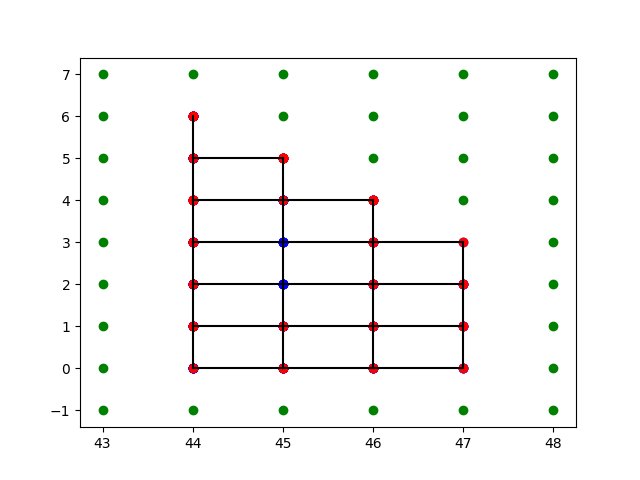

In [172]:
draw_xz()

In [ ]:
def clean_convex_hull_

100%|██████████| 540/540 [00:00<00:00, 148734.18it/s]


50


100%|██████████| 50/50 [00:00<00:00, 508.76it/s]


next_f done
128


100%|██████████| 128/128 [00:00<00:00, 214.91it/s]


next_f done
129


100%|██████████| 129/129 [00:00<00:00, 214.61it/s]


next_f done


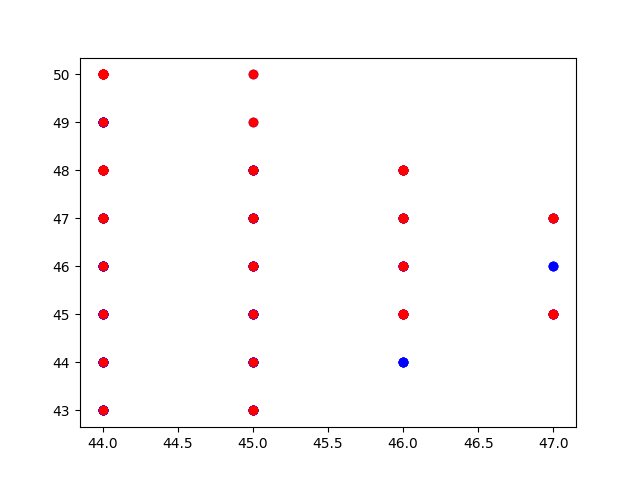

In [92]:
fig2 = plt.figure()
convex_hull = Convex_hull(cycle)

X = [p[:2] for p in cycle]
X_graph = [convex_hull.Graph.mapping[p][:2] for p in convex_hull.graph_dense.nodes()]

# plt.scatter(*zip(*X),color="red")
plt.scatter(*zip(*X_graph),color="blue")

plt.scatter(*zip(*X),color="red")

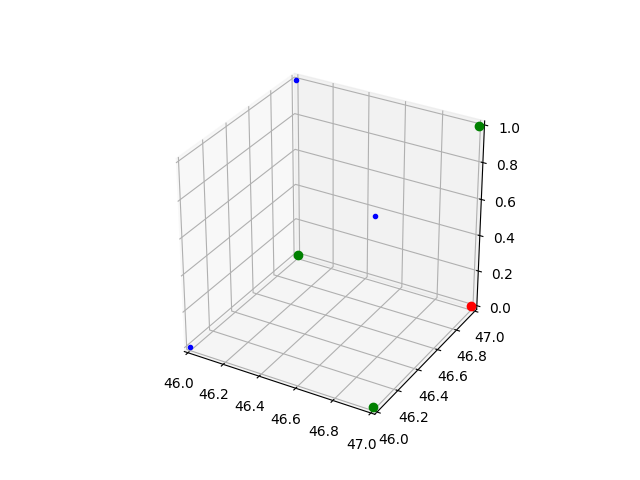

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

X,Y,Z = [],[],[]
for point in C:
    x,y,z = convex_hull.Graph.mapping[point]
    ax.plot([x],[y],[z], c='blue', marker='.')
    X.append(x)
    Y.append(y)
    Z.append(z)


pt = 406
x,y,z = convex_hull.Graph.mapping[pt]
ax.plot([x],[y],[z], c='r', marker='o')

D = set()
D.add(316 )
D.add(397 )
D.add(407)
for d in D:
    x,y,z = convex_hull.Graph.mapping[d]
    ax.plot([x],[y],[z], c='g', marker='o')

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()



In [35]:
len(all_neighbours)

26

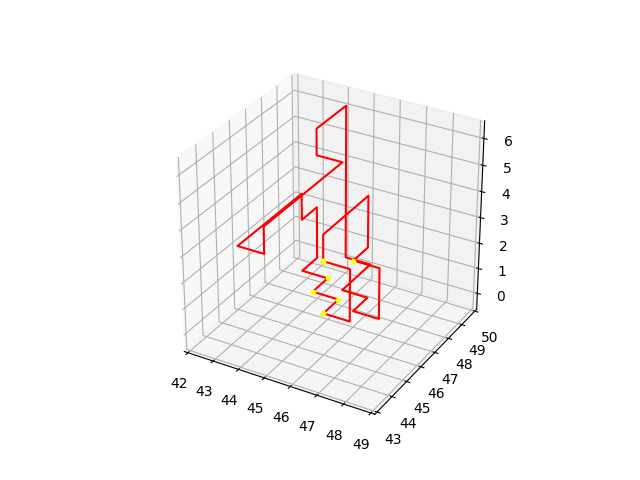

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')



X = []
Y = []
Z = []

for point in max_cycle:
    x,y,z = G.mapping[point]
    X.append(x)
    Y.append(y)
    Z.append(z)


ax.plot(X,Y,Z, c='r')

for point in S:
    x,y,z = G.mapping[point]
    ax.plot([x],[y],[z], c='yellow', marker='.')

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()



In [39]:
S = []
for node in cycle:
    if not ( node in convex_hull_nodes):
        S.append(node)

In [51]:
for node in convex_hull_nodes:
    if G_flot.degree(node) == 5:
        print(node)
    

16369
16726
16370
16402
16403
16032
16039
16404
16405
17095
16024
16031
16724
16046
16737
16744
16017
16018
17102
16038
16020
16730
16751
16040
16045
16027
16754
16047
16019
16049
16021
16367
16368
16025
16747
16034
16725
16026
16373
16041
16028
16033
16380
16048
16035
16042
17088
17089
16387
16394
17096
16401


In [95]:
#Flot maximal dans un graphe
G_flot = nx.Graph()

for e in edges:
    p1,p2 = e
    G_flot.add_edge(p1,p2,capacity=1)

s = -1
t = -2

for p in f_0:
    G_flot.add_edge(s,p,capacity=0)
    G_flot.add_edge(p,t,capacity=0)

cut_value, (set_S, set_T) = nx.minimum_cut(G_flot, s, t)

# Find the edges in the minimum cut
min_cut_edges = [(u, v) for u, v in G_flot.edges() if u in set_S and v in set_T]


In [97]:
len(min_cut_edges)

390

In [94]:
len(edges)

975

In [67]:
for p1 in tqdm(f_0):
    for p2 in f_0:
        if p1 != p2:
            short_path = nx.shortest_path(G.graph, p1, p2)
            for point in short_path:
                assert point in f_0, point

100%|██████████| 390/390 [00:17<00:00, 22.79it/s]


In [48]:
len(f_0)

94

In [35]:
import cProfile


# Initialize the profiler

profiler = cProfile.Profile()

# Start profiling
profiler.enable()

# Call the method you want to profile
nx.shortest_path(G.graph, 0, 1000)

# Stop profiling
profiler.disable()

# Print the profiling results
profiler.print_stats(sort='time')

         22162 function calls (22161 primitive calls) in 0.013 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.007    0.007    0.013    0.013 unweighted.py:260(_bidirectional_pred_succ)
     4316    0.004    0.000    0.005    0.000 coreviews.py:80(__getitem__)
     4316    0.001    0.000    0.001    0.000 coreviews.py:49(__iter__)
     4316    0.001    0.000    0.001    0.000 coreviews.py:43(__init__)
     4751    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
     4316    0.000    0.000    0.000    0.000 {built-in method builtins.iter}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
        1    0.000    0.000    0.013    0.013 unweighted.py:196(bidirectional_shortest_path)
        1    0.000    0.000    0.013    0.013 2888462059.py:1(<module>)
      2/1    0.000    0.000    0.013    0.013 backends.py:409(__call__)
        2    0.000    0.000    0.000   

In [34]:
f_0

{3626,
 3627,
 3628,
 3629,
 3630,
 3631,
 3632,
 3633,
 3634,
 3635,
 3636,
 3637,
 3638,
 3639,
 3640,
 3641,
 3642,
 3643,
 3644,
 3645,
 3646,
 3647,
 3648,
 3649,
 3650,
 3651,
 3652,
 3653,
 3654,
 3655,
 3656,
 3657,
 3658,
 3659,
 3660,
 3661,
 3662,
 3663,
 3664,
 3665,
 3666,
 3667,
 3668,
 3669,
 3670,
 3671,
 3672,
 3673,
 3674,
 3675,
 3676,
 3677,
 3678,
 3679,
 3680,
 3681,
 3682,
 3683,
 3684,
 3685,
 3686,
 3687,
 3688,
 3689,
 3690,
 3691,
 3692,
 3693,
 3694,
 3695,
 3696,
 3697,
 3698,
 3699,
 3700,
 3701,
 3702,
 3704,
 3705,
 3706,
 3707,
 3708,
 3709,
 3983,
 3984,
 3985,
 3986,
 3987,
 3988,
 3989,
 3990,
 3991,
 3992,
 3993,
 3994,
 3995,
 3996,
 3997,
 3998,
 3999,
 4000,
 4001,
 4002,
 4003,
 4004,
 4005,
 4006,
 4007,
 4008,
 4009,
 4010,
 4011,
 4012,
 4013,
 4014,
 4015,
 4016,
 4017,
 4018,
 4019,
 4020,
 4021,
 4022,
 4023,
 4024,
 4025,
 4026,
 4027,
 4028,
 4029,
 4030,
 4031,
 4032,
 4033,
 4034,
 4035,
 4036,
 4037,
 4038,
 4039,
 4040,
 4041,
 4042,